In [1]:
# Import all Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# allow plots to appear directly in the notebook

%matplotlib inline
sns.set_style("whitegrid")

# Import Statmodel & Sklearn libraries

from sklearn.linear_model import LinearRegression
from sklearn import metrics          # (# Not Matrices )
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf


In [2]:
data=pd.read_csv("C:/Users/Anupa/Desktop/Learnby- Machine learning & AI/Statistics & Machine Learning_August 2020/PPT & CODE/Linear Regression/Practise Code/Boston_Dataset.csv")
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
# To Find the Missing Values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Medv       0
dtype: int64

In [4]:
# TO fill the missing values using simple Imputer 
from sklearn.impute import SimpleImputer
Imputer=SimpleImputer(fill_value=np.nan,strategy="mean")
X=Imputer.fit_transform(data)


In [5]:
# To check the outliers
data.shape

(506, 14)

In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
data.quantile([0.01,0.99])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Medv
0.01,0.01361,0.0,1.2535,0.0,0.398,4.52445,6.61,1.20654,1.0,188.0,13.0,6.73,2.8830,7.01
0.99,41.37033,90.0,25.6500,1.0,0.871,8.33500,100.00,9.22277,24.0,666.0,21.2,396.90,33.9185,50.00


In [8]:
# Now to remove the outliers in lower side & in Upper side
# Lower Side 

data["CRIM"]=np.where(data["CRIM"]<0.006320,data["CRIM"].quantile(0.01),data["CRIM"])
data["INDUS"] = np.where(data["INDUS"] <1.25350, data['INDUS'].quantile(0.01), data['INDUS'])
data["AGE"] = np.where(data["AGE"] <6.61000, data['AGE'].quantile(0.01), data['AGE'])
data["B"] = np.where(data["B"] <6.73000, data['B'].quantile(0.01), data['B'])
data["LSTAT"] = np.where(data["LSTAT"] <2.88300, data['LSTAT'].quantile(0.01), data['LSTAT'])

# Upper Side
data["CRIM"]=np.where(data["CRIM"]>41.37,data["CRIM"].quantile(0.99),data["CRIM"])
data["ZN"]=np.where(data["ZN"]>90,data["ZN"].quantile(0.99),data["ZN"])
data["DIS"]=np.where(data["DIS"]>9.22, data['DIS'].quantile(0.99), data['DIS'])
data["TAX"]=np.where(data["TAX"]>666, data['TAX'].quantile(0.99), data['TAX'])
data["LSTAT"] = np.where(data["LSTAT"] >33.9185, data['LSTAT'].quantile(0.99), data['LSTAT'])

data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.375144,11.304348,11.139528,0.069170,0.554695,6.284634,68.584506,3.778047,9.549407,407.792490,18.455534,356.715751,12.642073,22.532806
std,6.908985,23.112644,6.856254,0.253994,0.115878,0.702617,28.127163,2.053302,8.707259,167.793987,2.164946,91.133441,7.074084,9.197104
min,0.006320,0.000000,1.253500,0.000000,0.385000,3.561000,6.610000,1.129600,1.000000,187.000000,12.600000,6.730000,2.883000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,41.370330,90.000000,27.740000,1.000000,0.871000,8.780000,100.000000,9.222770,24.000000,666.000000,22.000000,396.900000,33.918500,50.000000


In [9]:
data.shape

(506, 14)

In [10]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
Medv       float64
dtype: object

In [11]:
# Renaming Depent variable
data["Target"]=data["Medv"]
df=data.drop("Medv",axis=1)
data=df



In [12]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
Target     float64
dtype: object

In [13]:
# EDA 
# TO draw the pair plot 
X=data.drop("Target",axis=1)
Y=data["Target"]

In [14]:
X.shape

(506, 13)

In [15]:
Y.shape

(506,)

In [21]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

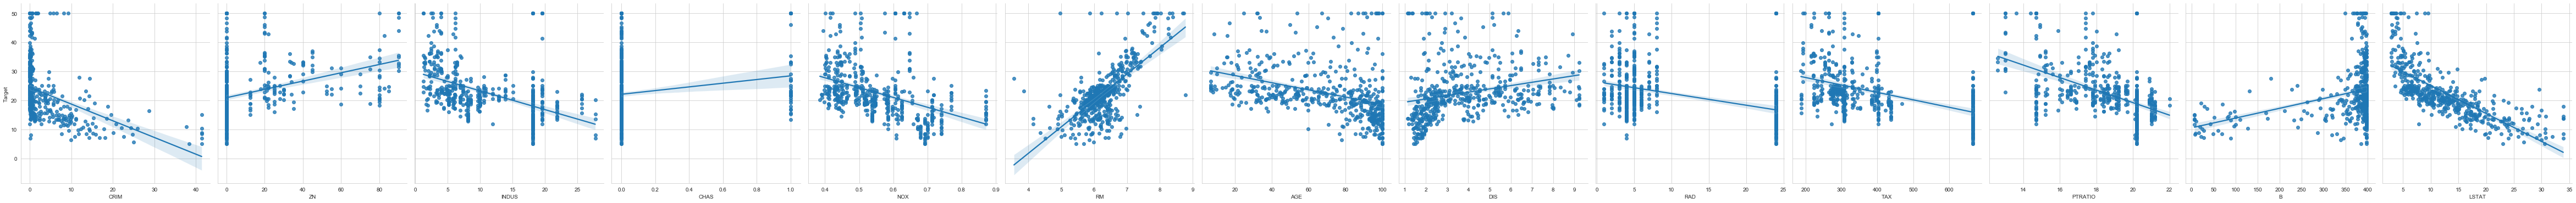

In [24]:
sns.pairplot(data,x_vars=X.columns,y_vars="Target",height=5,kind="reg")

In [25]:
# Now Consider OLS regression to find out which features are statistically significant
import statsmodels.api as sm
Regr=sm.OLS(Y,X)
Model=Regr.fit()
print(Model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Target   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.2
Date:                Sat, 06 Mar 2021   Prob (F-statistic):                        0.00
Time:                        21:51:07   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3129.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [29]:
# Dropping the variables which are statistically insignificant
# Only consider those variables which are statistically significant

sign_vars=["ZN","CHAS","RM","DIS","RAD","TAX","PTRATIO","B","LSTAT"]
XX=X[sign_vars]


In [34]:
# Train_test_split (80/20)

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(XX,Y,test_size=0.2,random_state=42)


In [38]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)

(404, 9)
(404,)
(102, 9)


In [41]:
# Load the data on model
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
model=linreg.fit(X_train,Y_train)

In [46]:
# Evaluationg the R-square

print(model.score(X_train,Y_train))

0.7354667913346886


In [62]:
# Intercept & Coefficent

print("%0.4f" %model.intercept_)

print(model.coef_)

combine_coef=(zip(XX,model.coef_))
list(combine_coef)

16.9770
[ 0.03385195  2.49306643  4.53170301 -1.00831873  0.19203061 -0.0138888
 -0.72144596  0.01365608 -0.59313107]


[('ZN', 0.03385195159906124),
 ('CHAS', 2.493066426811166),
 ('RM', 4.531703007119662),
 ('DIS', -1.0083187261858166),
 ('RAD', 0.19203060608579062),
 ('TAX', -0.013888804404552415),
 ('PTRATIO', -0.7214459647378778),
 ('B', 0.013656079810725504),
 ('LSTAT', -0.5931310742560113)]

In [65]:
# Predicted Value
pred_all=model.predict(XX)
pred_train=model.predict(X_train)
pred_test=model.predict(X_test)

In [76]:
# Calculate RMSE & MSE
print("Calculated MSE with X_train & Y_train %0.4f" %np.mean(pow((pred_train-Y_train),2)))
print("Calculated MSE with X_test & Y_test %0.4f" %np.mean(pow((pred_test-Y_test),2)))
print("Calculated MSE with X_all & Y_all %0.4f" %np.mean(pow((pred_all-Y),2)))

Calculated MSE with X_train & Y_train 22.9809
Calculated MSE with X_test & Y_test 24.8376
Calculated MSE with X_all & Y_all 23.3552


In [77]:
# Consider Train_test split (70/30)

XX_train, XX_test, YY_train, YY_test = train_test_split(XX,Y,test_size=0.3,random_state=42)

In [78]:
# Load the data on model
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
model1=linreg.fit(XX_train,YY_train)

In [81]:
# Evaluationg the R-square

print((model.score(XX_train,YY_train)*100))

72.72257644919449


In [82]:
# Intercept & Coefficent

print("%0.4f" %model1.intercept_)

print(model1.coef_)

combine1_coef=(zip(XX,model1.coef_))
list(combine1_coef)

20.0001
[ 0.03657819  3.09162656  4.07457581 -0.93592294  0.15382137 -0.01100656
 -0.73402729  0.01228997 -0.6341438 ]


[('ZN', 0.036578186459829666),
 ('CHAS', 3.0916265554715743),
 ('RM', 4.074575812724425),
 ('DIS', -0.935922942590772),
 ('RAD', 0.15382137002177218),
 ('TAX', -0.011006561926836885),
 ('PTRATIO', -0.7340272906680778),
 ('B', 0.01228996620910304),
 ('LSTAT', -0.6341437974650633)]

In [85]:
# Predicted Value
pred1_all=model.predict(XX)
pred1_train=model.predict(XX_train)
pred1_test=model.predict(XX_test)

In [87]:
# Calculate RMSE & MSE
print("Calculated MSE with XX_train & YY_train %0.4f" %np.mean(pow((pred1_train-YY_train),2)))
print("Calculated MSE with X_test & Y_test %0.4f" %np.mean(pow((pred1_test-YY_test),2)))
print("Calculated MSE with X_all & Y_all %0.4f" %np.mean(pow((pred1_all-Y),2)))

Calculated MSE with XX_train & YY_train 23.9759
Calculated MSE with X_test & Y_test 21.9095
Calculated MSE with X_all & Y_all 23.3552


Text(0.5, 1.0, 'Residual Plots')

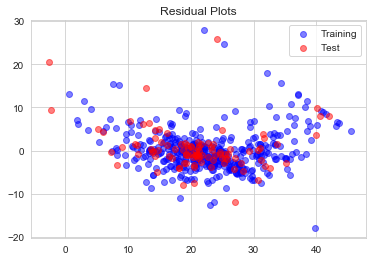

In [92]:
# Residual Plot for training & testing data set
# Scatter plot the training data
train = plt.scatter(pred_train,(Y_train-pred_train),c='b',alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(pred_test,(Y_test-pred_test),c='r',alpha=0.5)

# Plot a horizontal axis line at 0
#plt.hlines(y=0,xmin=-10,xmax=50)

#Labels
plt.legend((train,test),('Training','Test'))#,loc='lower left')
plt.title('Residual Plots')

In [94]:
data["Pred_Price"]=pd.DataFrame(model.predict(XX))
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target,Pred_Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,30.767361
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,25.246733
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,31.684274
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,30.224235
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,29.512874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4,25.222766
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6,23.688959
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9,29.729465
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0,28.136110


In [98]:
# Decile Method for Linear Regression

data['Rank_Pred']=pd.qcut(df['Pred_Price'].rank(method='first').values,5,duplicates='drop').codes+1
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target,Pred_Price,Rank_Pred
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,30.767361,5
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,25.246733,4
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,31.684274,5
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,30.224235,5
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,29.512874,5


In [99]:
data['Rank_Actual']=pd.qcut(df['Target'].rank(method='first').values,5,duplicates='drop').codes+1
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target,Pred_Price,Rank_Pred,Rank_Actual
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,30.767361,5,4
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,25.246733,4,3
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,31.684274,5,5
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,30.224235,5,5
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,29.512874,5,5


In [100]:
# Now Prepere a Pivot Table
pivot_table=pd.pivot_table(data,values='CRIM',index=['Rank_Pred'],columns=['Rank_Actual'],aggfunc='count')
pivot_table

Rank_Actual,1,2,3,4,5
Rank_Pred,,,,,
1,73.0,23.0,3.0,3.0,NaN
2,23.0,46.0,26.0,6.0,NaN
3,4.0,29.0,47.0,20.0,1.0
4,2.0,3.0,24.0,59.0,13.0
5,NaN,NaN,1.0,13.0,87.0


In [ ]:
# Diagonal count = 73+46+47+59+87 = 312
# + - 1 Diagonal count = 23+23+29+26+24+20+13+13 +312 = 483

# % Obs On Diagonal = 62%
# % Obs on + - 1 Diagonal = 96%

# 62% of the data is ranked same both in Actuals and Predicted
# 96% of the data is ranked in +/-1 of The Actuals  and Predicted

# How high the percentage will be will depend on the data, avaiable features etc. If we had access to more featues, we 
# could have had a higher percentage.
